## Previous configuration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# import os
import sys
sys.path.append("../")

In [2]:
# Custom imports
from data_loader import load_and_split_data
from src.config_manager import read_config

In [3]:
config = read_config("../config.yaml")
config

{'data': {'train_path': 'data/raw/train.csv',
  'test_path': 'data/raw/test.csv'},
 'base': {'RANDOM_SEED': 20},
 'modeling': {'TARGET_COLUMN': 'SalePrice', 'VALID_SIZE': 0.2},
 'hyperparameters': {'ALPHA_RIDGE': [0.1, 1.0, 10.0],
  'ALPHA_LASSO': [0.001, 0.01, 0.1],
  'ELASTICNET_L1_RATIO': 0.5}}

## Load and split data

In [4]:
X_train, _, y_train, _ = load_and_split_data(config)

In [5]:
print("Shape of X_train:", X_train.shape, "\nShape of y_train:", y_train.shape)

Shape of X_train: (1168, 80) 
Shape of y_train: (1168,)


## Exploratory Data Analysis

### Target: `SalePrice`

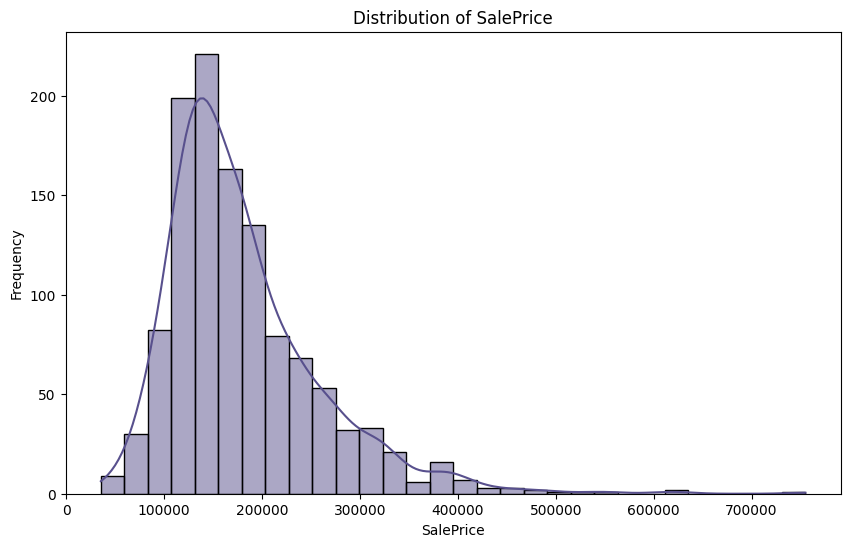

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='#58508d')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

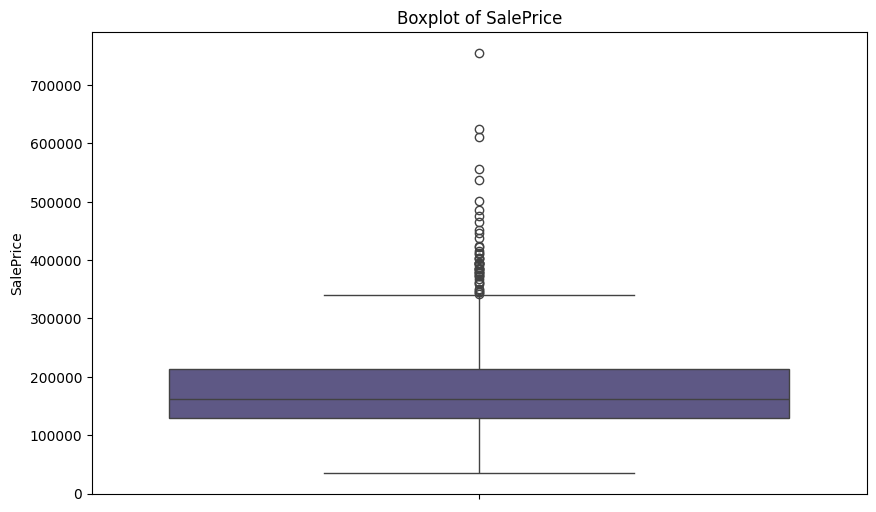

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train, color='#58508d')
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')
plt.show()

In [8]:
def calculate_skewness_kurtosis(data):
    skewness = float(skew(data))
    kurt = float(kurtosis(data, fisher=False)) # Use fisher=False to get Pearson's definition (kurtosis of normal distribution = 3)
    
    if skewness > 1:
        skewness_type = "highly positively skewed"
    elif 0.5 < skewness <= 1:
        skewness_type = "moderately positively skewed"
    elif -0.5 <= skewness <= 0.5:
        skewness_type = "approximately symmetric"
    elif -1 <= skewness < -0.5:
        skewness_type = "moderately negatively skewed"
    else:
        skewness_type = "highly negatively skewed"
    
    if kurt > 3:
        kurtosis_type = "leptokurtic"
    elif kurt == 3:
        kurtosis_type = "mesokurtic"
    else:
        kurtosis_type = "platykurtic"

    return {
        "skewness": round(skewness, 2),
        "skewness_type": skewness_type,
        "kurtosis": round(kurt, 2),
        "kurtosis_type": kurtosis_type
    }


In [9]:
calculate_skewness_kurtosis(y_train)

{'skewness': 1.71,
 'skewness_type': 'highly positively skewed',
 'kurtosis': 8.32,
 'kurtosis_type': 'leptokurtic'}

As we can observe, the distribution is highly positively skewed and leptokurtic. This indicates that approximately 50% of the SalePrice values fall between \$100,000 and \$300,000. However, there are numerous outliers with significantly higher SalePrice values, reaching up to nearly \$800,000.

💥This conclusion suggests that applying a logarithmic transformation to SalePrice may help approximate a normal distribution, which is often desirable for many statistical models and machine learning algorithms.💥

### Missing values

In [10]:
pct_missing = X_train.isna().mean() * 100
missing_data = pd.DataFrame({'feature': X_train.columns, '% missing': pct_missing})
missing_data = missing_data[missing_data['% missing'] > 0].sort_values(by='% missing', ascending=False)
missing_data.style.hide(axis="index").format({'% missing': '{:.2f}%'})

feature,% missing
PoolQC,99.49%
MiscFeature,96.40%
Alley,93.75%
Fence,81.16%
MasVnrType,60.10%
FireplaceQu,47.69%
LotFrontage,17.81%
GarageType,5.91%
GarageYrBlt,5.91%
GarageFinish,5.91%


- When `PoolQC` is NaN, it indicates that the house does not have a pool. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of a pool.💥
- When `MiscFeature` is NaN, it indicates that the property does not have any miscellaneous feature beyond those covered by other categories. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of such features.💥
- When `Alley` is NaN, it indicates that the property does not have access to the alley. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of access to the alley.💥
- When `Fence` is NaN, it indicates that the property does not have fence. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of fence.💥
- When `MasVnrType` is NaN, it indicates that the property does not have masonry veneer. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of masonry veneer.💥
- When `FireplaceQu` is NaN, it indicates that the property does not have fireplace. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of fireplace.💥
- When `LotFrontage` is NaN, it means the linear feet of street frontage for the property was not recorded. 💥These values represent true missing data and will likely require an appropriate imputation strategy.💥
- When `GarageType` is NaN, it indicates that the property does not have garage. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of garage.💥



In [25]:
((X_train['GarageType']).isna() == (X_train['GarageYrBlt']).isna()).all()

np.True_

- When `GarageYrBlt` is NaN, it means the year the garage was built was not recorded because the property does not have a garage. 💥Therefore, we will replace these missing values with 0 to explicitly represent the absence of a garage in this numeric feature.💥
- When `GarageFinish` is NaN, it indicates that the property does not have garage. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of garage.💥
- When `GarageQual` is NaN, it indicates that the property does not have garage. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of garage.💥
- When `GarageCond` is NaN, it indicates that the property does not have garage. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of garage.💥
- When `BsmtFinType2` is NaN, it indicates that the property does not have basement. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of basement.💥
- When `BsmtCond` is NaN, it indicates that the property does not have basement. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of basement.💥
- When `BsmtQual` is NaN, it indicates that the property does not have basement. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of basement.💥
- When `BsmtExposure` is NaN, it indicates that the property does not have basement. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of basement.💥
- When `BsmtFinType1` is NaN, it indicates that the property does not have basement. 💥Therefore, we will replace these missing values with the category 'None' to explicitly represent the absence of basement.💥

In [36]:
ct = pd.crosstab(
    X_train['MasVnrArea'].isna(),
    X_train['MasVnrType'].isna(),
    rownames=['MasVnrArea is NaN'],
    colnames=['MasVnrType is NaN']
)
print(ct)


MasVnrType is NaN  False  True 
MasVnrArea is NaN              
False                466    695
True                   0      7
